# Simple Regression - Manual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Seed
np.random.seed(101)

In [3]:
# Create x data
x = np.linspace(0.0, 10.0, 300)

In [4]:
# Noise for y data
noise = np.random.randn(len(x))

## Linear regerssion formula
\begin{equation*}
\Large
y = Wx + b
\end{equation*}

\begin{equation*}
W = 0.5
\end{equation*}

\begin{equation*}
b = 5
\end{equation*}

In [5]:
# Create y data
y_true = 0.5 * x + 5 + noise

In [6]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.3, random_state=101)

Text(0, 0.5, 'y')

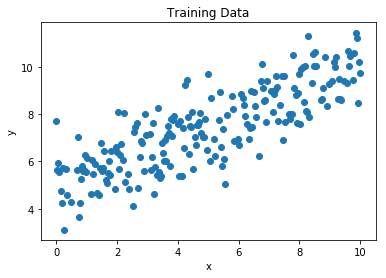

In [7]:
# Plot training data
plt.scatter(X_train,y_train)
# Title
plt.title('Training Data')
# Labels names
plt.xlabel('x')
plt.ylabel('y')

## Sum of Square Error Equation

\begin{equation*}
\Large
Error_{(W,b)} = \frac{1}{N}\sum_{i=1}^N(y_i - (Wx_i + b))^2
\end{equation*}

In [8]:
# Function to compute MSE error
def mse_error(labels, predictions):
    """
        labels: y_true
        predictions: y_hat
    """
    error = 0
    for label, pred in zip(labels, predictions):
        error += (label - pred) ** 2
    return error / float(len(labels))

    # It can also be done in matrix form
    # return (np.sum((labels-predictions)**2))/len(labels)

## Gradient

\begin{equation*}
\Large
\frac{\partial E}{\partial W}=\frac{2}{N}\sum_{i=1}^N-x_i(y_i - (Wx_i + b))
\end{equation*}

\begin{equation*}
\Large
\frac{\partial E}{\partial b}=\frac{2}{N}\sum_{i=1}^N-(y_i - (Wx_i + b))
\end{equation*}

In [9]:
# Function to compute gradient
def gradient(features, labels, predictions):
    """
        features: x
        labels: y_true
        predictions: y_hat
    """
    w_gradient = 0
    b_gradient = 0
    N = len(features)
    for feat, label, pred in zip(features, labels, predictions):
        w_gradient += -(2/N) * feat * (label - pred)
        b_gradient += -(2/N) * (label - pred)
    return w_gradient, b_gradient

    # It can also be done in matrix form
    #     w_gradient = -np.sum(np.dot(features, (labels - predictions)))*(2/len(labels))
    #     b_gradient = -np.sum(labels - predictions)*(2/len(labels))
    #     return w_gradient, b_gradient

In [10]:
# Randomly initialize W and b
W = np.random.randn()
b = np.random.randn()

In [ ]:
# Learning rate
learning_rate = 0.0001
# Epochs
epochs = 100000

# Training loop
for epoch in range(epochs):
    # Predictions for training data
    y_hat_train = W*X_train + b
    # Error
    error = mse_error(y_train, y_hat_train)
    # Gradient
    new_w, new_b = gradient(X_train, y_train, y_hat_train)
    # Update W
    W = W - learning_rate * new_w
    # Update b
    b = b - learning_rate * new_b
    # Print training progress every 1000 epochs
    if epoch % 1000 == 0:
        print('Epoch: {}, Error: {}'.format(epoch, error))

Text(0, 0.5, 'y')

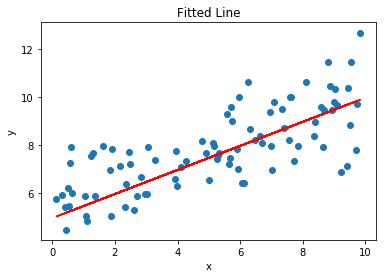

In [12]:
# Predictions for test data
y_hat_test = W*X_test + b
# Plot test data
plt.scatter(X_test, y_test)
# Plot line fitted to test data
plt.plot(X_test, y_hat_test, 'r')
# Title
plt.title('Fitted Line')
# Labels names
plt.xlabel('x')
plt.ylabel('y')

# Simple Regression - Sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Create Linear Regression model
lr = LinearRegression()
# Train model (X_train has to be 2 dimension)
lr.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Predictions
preds = lr.predict(X_test.reshape(-1,1))

Text(0, 0.5, 'y')

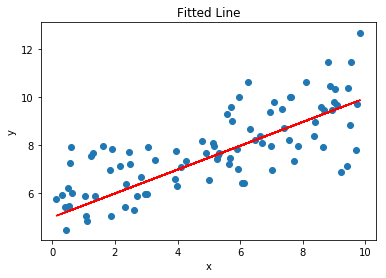

In [16]:
# Plot test data
plt.scatter(X_test, y_test)
# Plot line fitted to test data
plt.plot(X_test, preds, 'r')
# Title
plt.title('Fitted Line')
# Labels names
plt.xlabel('x')
plt.ylabel('y')